# CCADMACL (Midterm Exam)

## Import the libraries

In [263]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

## Load the datasets

In [264]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")

## Plot the datasets

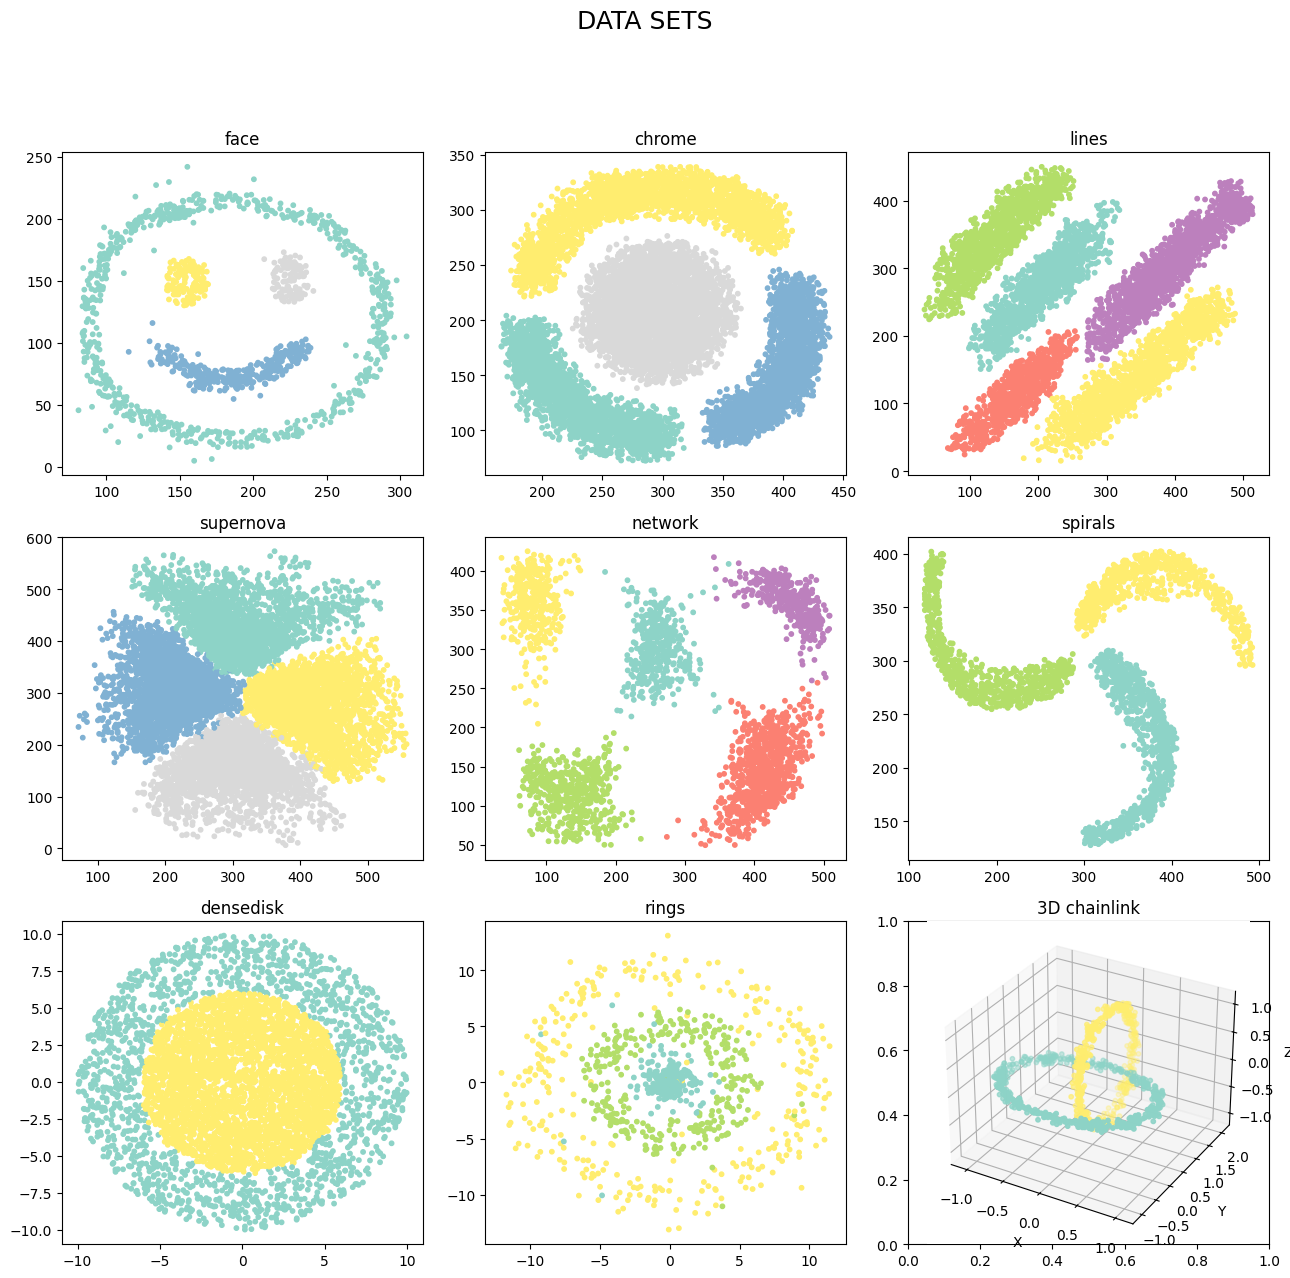

In [265]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

## A. Use K-means to cluster each dataset

1. Create each copy of the dataset for k-means

In [266]:
face_kmeans_df = face_df.copy()
chrome_kmeans_df = chrome_df.copy()
lines2_kmeans_df = lines2_df.copy()
supernova_kmeans_df = supernova_df.copy()
network_kmeans_df = network_df.copy()
spirals_kmeans_df = spirals_df.copy()
densedisk_kmeans_df = densedisk_df.copy()
rings_kmeans_df = rings_df.copy()
chainlink_kmeans_df = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [267]:
face_kmeans_df = face_kmeans_df.drop(columns=['color'])
chrome_kmeans_df = chrome_kmeans_df.drop(columns=['color'])
lines2_kmeans_df = lines2_kmeans_df.drop(columns=['color'])
supernova_kmeans_df = supernova_kmeans_df.drop(columns=['color'])
network_kmeans_df = network_kmeans_df.drop(columns=['color'])
spirals_kmeans_df = spirals_kmeans_df.drop(columns=['color'])
densedisk_kmeans_df = densedisk_kmeans_df.drop(columns=['color'])
rings_kmeans_df = rings_kmeans_df.drop(columns=['color'])
chainlink_kmeans_df = chainlink_kmeans_df.drop(columns=['color'])

3. Train a K-means model for each dataset.

In [268]:
kmeans_face = KMeans(n_clusters=4, random_state=0)
kmeans_face.fit(face_kmeans_df)

kmeans_chrome = KMeans(n_clusters=4, random_state=0)
kmeans_chrome.fit(chrome_kmeans_df)

kmeans_lines2 = KMeans(n_clusters=5, random_state=0)
kmeans_lines2.fit(lines2_kmeans_df)

kmeans_supernova = KMeans(n_clusters=4, random_state=0)
kmeans_supernova.fit(supernova_kmeans_df)

kmeans_network = KMeans(n_clusters=5, random_state=0)
kmeans_network.fit(network_kmeans_df)

kmeans_spirals = KMeans(n_clusters=3, random_state=0)
kmeans_spirals.fit(spirals_kmeans_df)

kmeans_densedisk = KMeans(n_clusters=2, random_state=0)
kmeans_densedisk.fit(densedisk_kmeans_df)

kmeans_rings = KMeans(n_clusters=3, random_state=42)
kmeans_rings.fit(rings_kmeans_df)

kmeans_chainlink = KMeans(n_clusters=2, random_state=0)
kmeans_chainlink.fit(chainlink_kmeans_df)

KMeans(n_clusters=2, random_state=0)

4. Add a "Cluster" column for each data set

In [269]:
face_kmeans_df['Cluster_KMeans'] = kmeans_face.labels_
chrome_kmeans_df['Cluster_KMeans'] = kmeans_chrome.labels_
lines2_kmeans_df['Cluster_KMeans'] = kmeans_lines2.labels_
supernova_kmeans_df['Cluster_KMeans'] = kmeans_supernova.labels_
network_kmeans_df['Cluster_KMeans'] = kmeans_network.labels_
spirals_kmeans_df['Cluster_KMeans'] = kmeans_spirals.labels_
densedisk_kmeans_df['Cluster_KMeans'] = kmeans_densedisk.labels_
rings_kmeans_df['Cluster_KMeans'] = kmeans_rings.labels_
chainlink_kmeans_df['Cluster_KMeans'] = kmeans_chainlink.labels_

5. Plot the Correct cluster and the K-means cluster

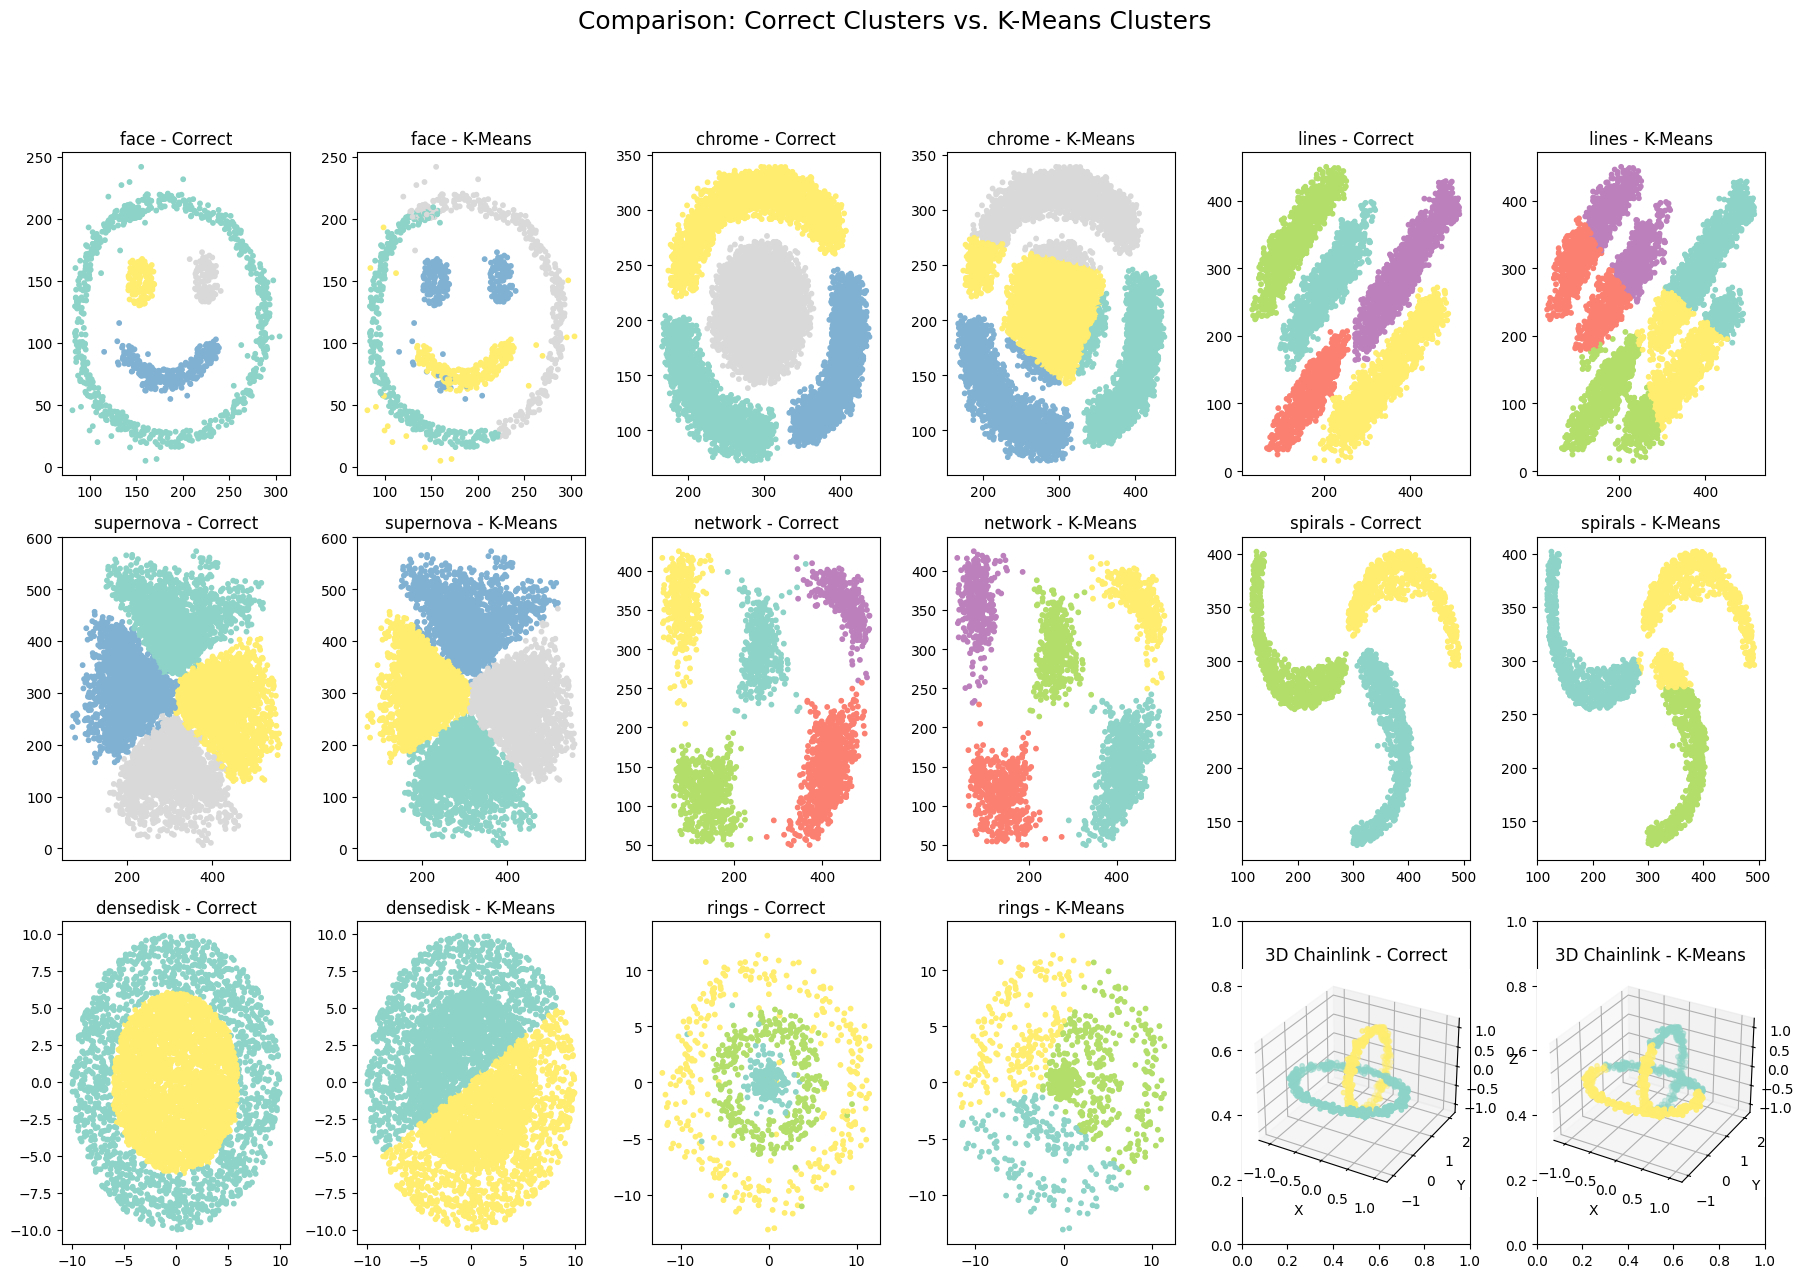

In [270]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 13))
fig.suptitle('Comparison: Correct Clusters vs. K-Means Clusters\n', size=18)

# Define datasets and titles
datasets = [
    (face_df, face_kmeans_df, "face"),
    (chrome_df, chrome_kmeans_df, "chrome"),
    (lines2_df, lines2_kmeans_df, "lines"),
    (supernova_df, supernova_kmeans_df, "supernova"),
    (network_df, network_kmeans_df, "network"),
    (spirals_df, spirals_kmeans_df, "spirals"),
    (densedisk_df, densedisk_kmeans_df, "densedisk"),
    (rings_df, rings_kmeans_df, "rings")
]

# Plot 2D datasets
for idx, (correct_df, kmeans_df, title) in enumerate(datasets):
    row = idx // 3
    col = (idx % 3) * 2  # Ensure 2 columns per dataset (correct and K-means)

    # Correct clusters
    axes[row, col].scatter(correct_df['x'], correct_df['y'], c=correct_df['color'], s=10, cmap="Set3")
    axes[row, col].set_title(f"{title} - Correct")

    # K-means clusters
    axes[row, col + 1].scatter(kmeans_df['x'], kmeans_df['y'], c=kmeans_df['Cluster_KMeans'], s=10, cmap="Set3")
    axes[row, col + 1].set_title(f"{title} - K-Means")

# 3D Chainlink Plot
ax3d_correct = fig.add_subplot(3, 6, 17, projection='3d')
ax3d_correct.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_correct.set_title("3D Chainlink - Correct")
ax3d_correct.set_xlabel("X")
ax3d_correct.set_ylabel("Y")
ax3d_correct.set_zlabel("Z")

ax3d_kmeans = fig.add_subplot(3, 6, 18, projection='3d')
ax3d_kmeans.scatter(chainlink_kmeans_df['x'], chainlink_kmeans_df['y'], chainlink_kmeans_df['z'], c=chainlink_kmeans_df['Cluster_KMeans'], cmap="Set3", s=10)
ax3d_kmeans.set_title("3D Chainlink - K-Means")
ax3d_kmeans.set_xlabel("X")
ax3d_kmeans.set_ylabel("Y")
ax3d_kmeans.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [271]:
face_agg_df = face_df.copy()
chrome_agg_df = chrome_df.copy()
lines2_agg_df = lines2_df.copy()
supernova_agg_df = supernova_df.copy()
network_agg_df = network_df.copy()
spirals_agg_df = spirals_df.copy()
densedisk_agg_df = densedisk_df.copy()
rings_agg_df = rings_df.copy()
chainlink_agg_df = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [272]:
face_agg_df = face_agg_df.drop(columns=['color'])
chrome_agg_df = chrome_agg_df.drop(columns=['color'])
lines2_agg_df = lines2_agg_df.drop(columns=['color'])
supernova_agg_df = supernova_agg_df.drop(columns=['color'])
network_agg_df = network_agg_df.drop(columns=['color'])
spirals_agg_df = spirals_agg_df.drop(columns=['color'])
densedisk_agg_df = densedisk_agg_df.drop(columns=['color'])
rings_agg_df = rings_agg_df.drop(columns=['color'])
chainlink_agg_df = chainlink_agg_df.drop(columns=['color'])

3. Train a Agglomerative Clustering model for each dataset.

In [273]:
agg_face = AgglomerativeClustering(n_clusters=4)
agg_face.fit(face_agg_df)

agg_chrome = AgglomerativeClustering(n_clusters=4)
agg_chrome.fit(chrome_agg_df)

agg_lines2 = AgglomerativeClustering(n_clusters=5)
agg_lines2.fit(lines2_agg_df)

agg_supernova = AgglomerativeClustering(n_clusters=4)
agg_supernova.fit(supernova_agg_df)

agg_network = AgglomerativeClustering(n_clusters=5)
agg_network.fit(network_agg_df)

agg_spirals = AgglomerativeClustering(n_clusters=3)
agg_spirals.fit(spirals_agg_df)

agg_densedisk = AgglomerativeClustering(n_clusters=2)
agg_densedisk.fit(densedisk_agg_df)

agg_rings = AgglomerativeClustering(n_clusters=3)
agg_rings.fit(rings_agg_df)

agg_chainlink = AgglomerativeClustering(n_clusters=2)
agg_chainlink.fit(chainlink_agg_df)

AgglomerativeClustering()

4. Add a "Cluster" column for each data set

In [274]:
face_agg_df['Cluster_Agg'] = agg_face.labels_
chrome_agg_df['Cluster_Agg'] = agg_chrome.labels_
lines2_agg_df['Cluster_Agg'] = agg_lines2.labels_
supernova_agg_df['Cluster_Agg'] = agg_supernova.labels_
network_agg_df['Cluster_Agg'] = agg_network.labels_
spirals_agg_df['Cluster_Agg'] = agg_spirals.labels_
densedisk_agg_df['Cluster_Agg'] = agg_densedisk.labels_
rings_agg_df['Cluster_Agg'] = agg_rings.labels_
chainlink_agg_df['Cluster_Agg'] = agg_chainlink.labels_

5. Plot the Correct cluster and the Agglomerative cluster

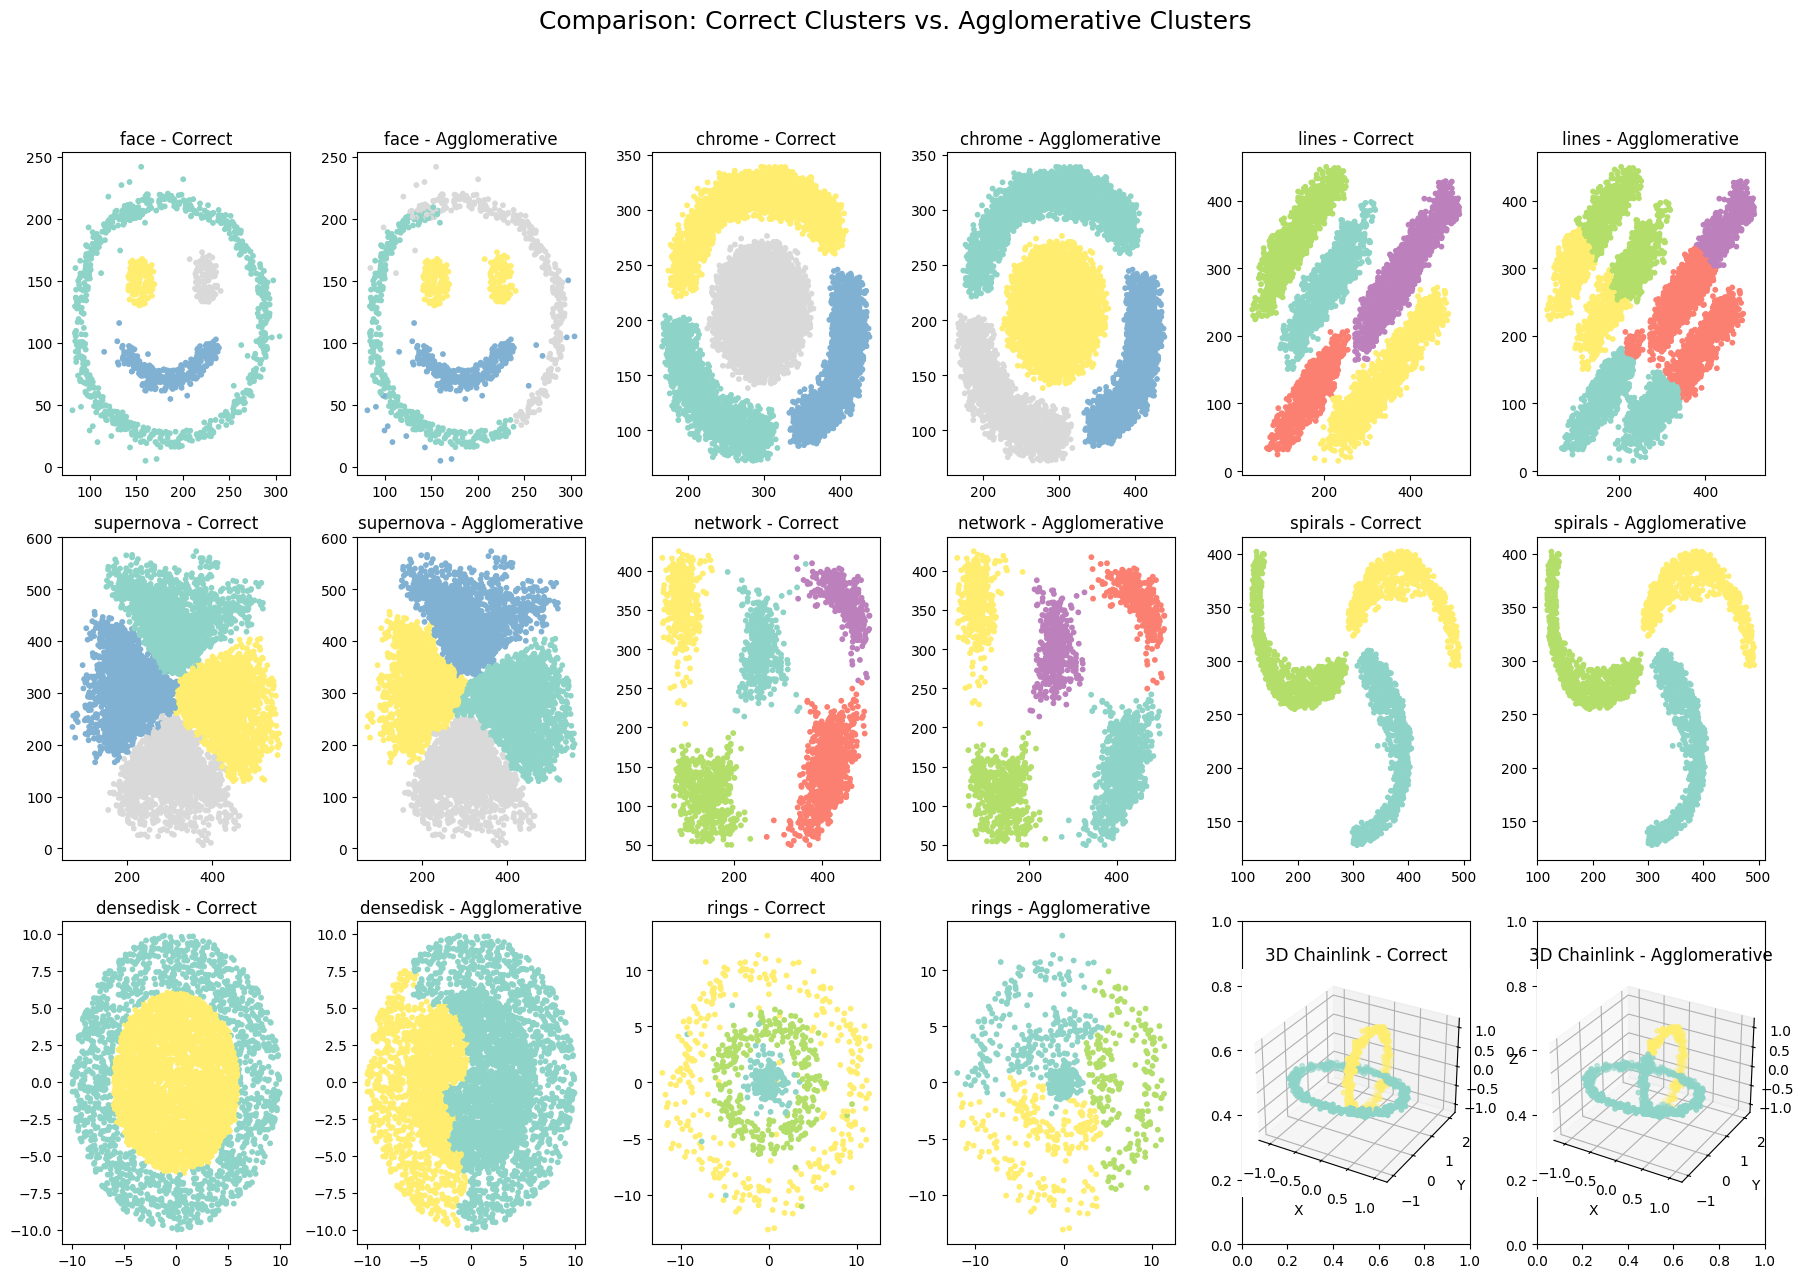

In [275]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 13))
fig.suptitle('Comparison: Correct Clusters vs. Agglomerative Clusters\n', size=18)

# Define datasets and titles
datasets = [
    (face_df, face_agg_df, "face"),
    (chrome_df, chrome_agg_df, "chrome"),
    (lines2_df, lines2_agg_df, "lines"),
    (supernova_df, supernova_agg_df, "supernova"),
    (network_df, network_agg_df, "network"),
    (spirals_df, spirals_agg_df, "spirals"),
    (densedisk_df, densedisk_agg_df, "densedisk"),
    (rings_df, rings_agg_df, "rings")
]

# Plot 2D datasets
for idx, (correct_df, agg_df, title) in enumerate(datasets):
    row = idx // 3
    col = (idx % 3) * 2  # Ensure 2 columns per dataset (correct and Agglomerative)

    # Correct clusters
    axes[row, col].scatter(correct_df['x'], correct_df['y'], c=correct_df['color'], s=10, cmap="Set3")
    axes[row, col].set_title(f"{title} - Correct")

    # Agglomerative clusters
    axes[row, col + 1].scatter(agg_df['x'], agg_df['y'], c=agg_df['Cluster_Agg'], s=10, cmap="Set3")
    axes[row, col + 1].set_title(f"{title} - Agglomerative")

# 3D Chainlink Plot
ax3d_correct = fig.add_subplot(3, 6, 17, projection='3d')
ax3d_correct.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_correct.set_title("3D Chainlink - Correct")
ax3d_correct.set_xlabel("X")
ax3d_correct.set_ylabel("Y")
ax3d_correct.set_zlabel("Z")

ax3d_agg = fig.add_subplot(3, 6, 18, projection='3d')
ax3d_agg.scatter(chainlink_agg_df['x'], chainlink_agg_df['y'], chainlink_agg_df['z'], c=chainlink_agg_df['Cluster_Agg'], cmap="Set3", s=10)
ax3d_agg.set_title("3D Chainlink - Agglomerative")
ax3d_agg.set_xlabel("X")
ax3d_agg.set_ylabel("Y")
ax3d_agg.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## C. Use DBSCAN to cluster each dataset

1. Create each copy of the dataset for DBSCAN Clustering

In [276]:
datasets_dbscan = {
    "face": face_df.copy(),
    "chrome": chrome_df.copy(),
    "lines2": lines2_df.copy(),
    "supernova": supernova_df.copy(),
    "network": network_df.copy(),
    "spirals": spirals_df.copy(),
    "densedisk": densedisk_df.copy(),
    "rings": rings_df.copy(),
    "chainlink": chainlink_df.copy()
}

2. Drop the "color" column on all datasets

In [277]:
for name, df in datasets_dbscan.items():
    datasets_dbscan[name] = df.drop(columns=["color"])

3. Train a DBSCAN Clustering model for each dataset.

In [278]:
dbscan_models = {}
best_params = {
    "face": (9, 3),
    "chrome": (13, 45),
    "lines2": (15.5, 14),
    "supernova": (11, 22),
    "network": (20, 4),
    "spirals": (9, 4),
    "densedisk": (0.85, 42),
    "rings": (2, 31),
    "chainlink": (0.5, 5)
}

for name, df in datasets_dbscan.items():
    eps, min_samples = best_params[name]

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    if name == "chainlink":
        dbscan.fit(df[["x", "y", "z"]])
    else:
        dbscan.fit(df[["x", "y"]])
    dbscan_models[name] = dbscan

4. Add a "Cluster" column for each data set

In [279]:
for name, df in datasets_dbscan.items():
    if name == "chainlink":
        datasets_dbscan[name]['Cluster'] = dbscan_models[name].labels_
    else:
        datasets_dbscan[name]['Cluster'] = dbscan_models[name].labels_

5. Plot the correct Cluster and the DBSCAN Cluster


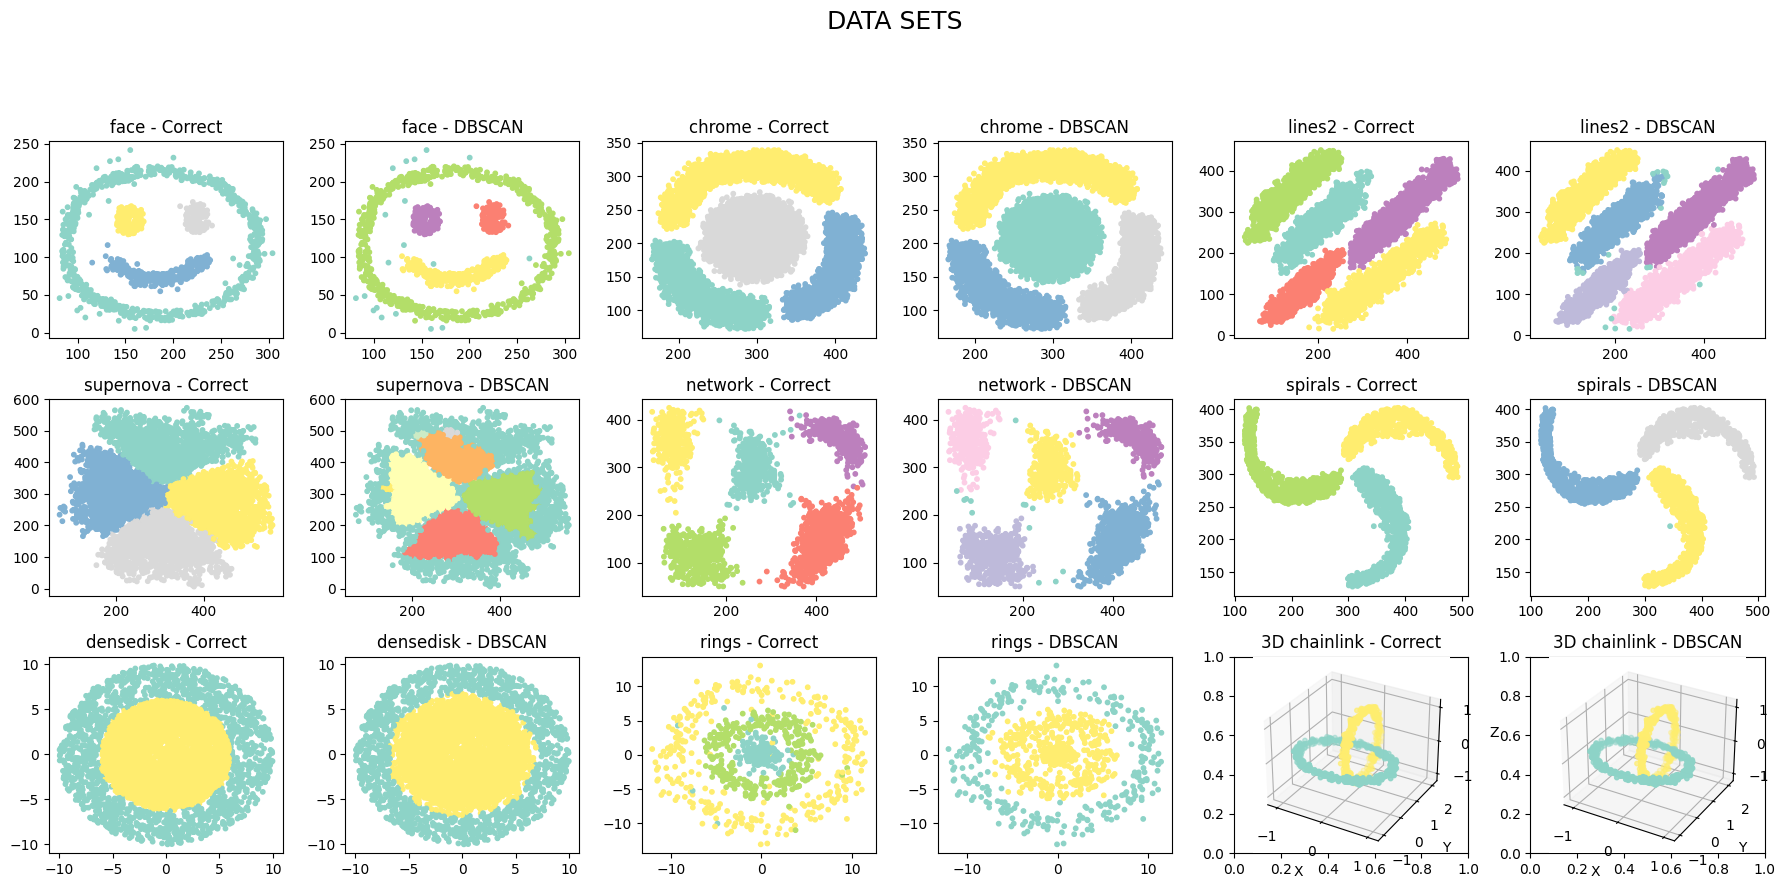

In [280]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 9))
fig.suptitle('DATA SETS\n', size=18)

datasets = ["face", "chrome", "lines2", "supernova", "network", "spirals", "densedisk", "rings", "chainlink"]
i = 0
j = 0
for name in datasets[:-1]:
    axes[i, j].scatter(datasets_dbscan[name]['x'], datasets_dbscan[name]['y'], c=eval(f"{name}_df['color']"), s=10, cmap="Set3")
    axes[i, j].set_title(f"{name} - Correct")
    axes[i, j+1].scatter(datasets_dbscan[name]['x'], datasets_dbscan[name]['y'], c=datasets_dbscan[name]['Cluster'], s=10, cmap="Set3")
    axes[i, j+1].set_title(f"{name} - DBSCAN")
    j+=2
    if j == 6:
      i+=1
      j = 0

ax3d_correct = fig.add_subplot(3, 6, 17, projection='3d')
ax3d_correct.scatter(datasets_dbscan["chainlink"]['x'], datasets_dbscan["chainlink"]['y'], datasets_dbscan["chainlink"]['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_correct.set_title("3D chainlink - Correct")
ax3d_correct.set_xlabel("X")
ax3d_correct.set_ylabel("Y")
ax3d_correct.set_zlabel("Z")

ax3d_dbscan = fig.add_subplot(3, 6, 18, projection='3d')
ax3d_dbscan.scatter(datasets_dbscan["chainlink"]['x'], datasets_dbscan["chainlink"]['y'], datasets_dbscan["chainlink"]['z'], c=datasets_dbscan["chainlink"]['Cluster'], cmap="Set3", s=10)
ax3d_dbscan.set_title("3D chainlink - DBSCAN")
ax3d_dbscan.set_xlabel("X")
ax3d_dbscan.set_ylabel("Y")
ax3d_dbscan.set_zlabel("Z")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## D. Compare all algorithms

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.

- Each row should contain each dataset
- Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

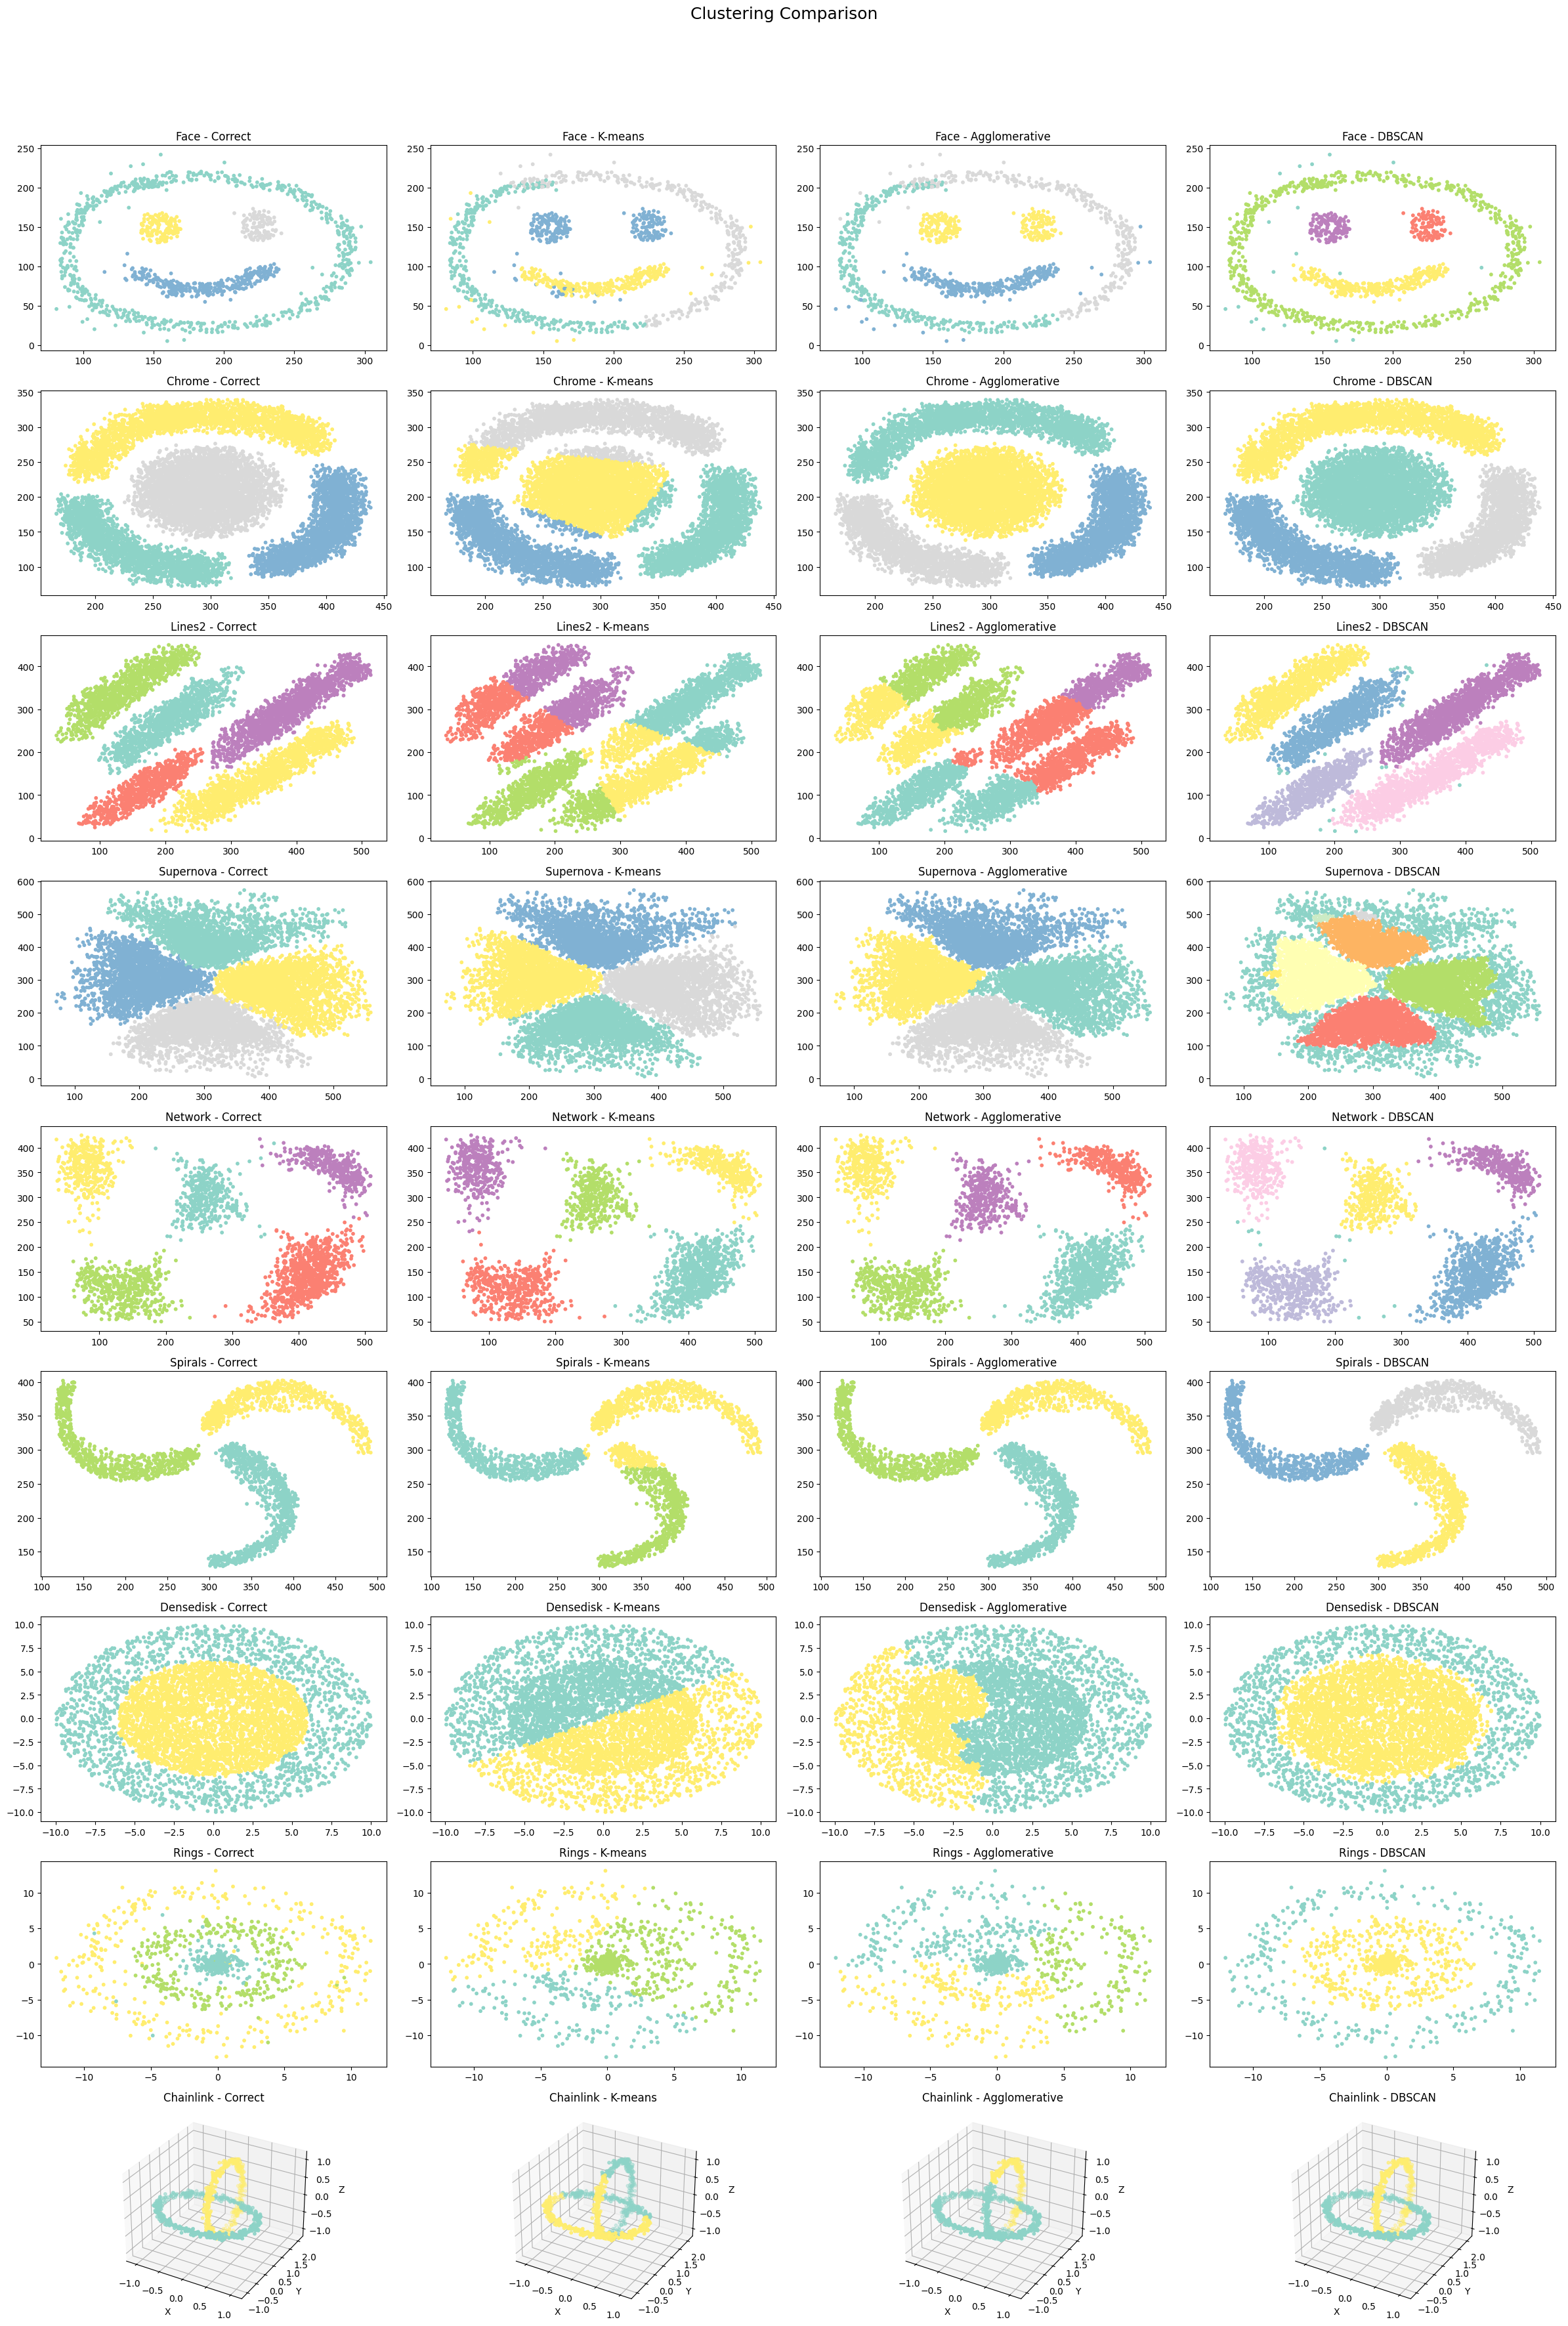

In [281]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# List of datasets and titles
datasets = [
    ("face", face_df, face_kmeans_df, face_agg_df, datasets_dbscan["face"]),
    ("chrome", chrome_df, chrome_kmeans_df, chrome_agg_df, datasets_dbscan["chrome"]),
    ("lines2", lines2_df, lines2_kmeans_df, lines2_agg_df, datasets_dbscan["lines2"]),
    ("supernova", supernova_df, supernova_kmeans_df, supernova_agg_df, datasets_dbscan["supernova"]),
    ("network", network_df, network_kmeans_df, network_agg_df, datasets_dbscan["network"]),
    ("spirals", spirals_df, spirals_kmeans_df, spirals_agg_df, datasets_dbscan["spirals"]),
    ("densedisk", densedisk_df, densedisk_kmeans_df, densedisk_agg_df, datasets_dbscan["densedisk"]),
    ("rings", rings_df, rings_kmeans_df, rings_agg_df, datasets_dbscan["rings"]),
    ("chainlink", chainlink_df, chainlink_kmeans_df, chainlink_agg_df, datasets_dbscan["chainlink"]),
]

# Prepare the plot
fig = plt.figure(figsize=(24, len(datasets) * 4))
fig.suptitle("Clustering Comparison\n", size=18)

# Iterate through datasets
for i, (name, correct_df, kmeans_df, agg_df, dbscan_df) in enumerate(datasets):
    row = i * 4 + 1

    # Correct cluster
    if name == "chainlink":  # 3D plot for chainlink
        ax_correct = fig.add_subplot(len(datasets), 4, row, projection='3d')
        ax_correct.scatter(correct_df['x'], correct_df['y'], correct_df['z'], c=correct_df['color'], cmap="Set3", s=10)
        ax_correct.set_title(f"{name.capitalize()} - Correct")
        ax_correct.set_xlabel("X")
        ax_correct.set_ylabel("Y")
        ax_correct.set_zlabel("Z")
    else:  # 2D plot
        ax_correct = fig.add_subplot(len(datasets), 4, row)
        ax_correct.scatter(correct_df['x'], correct_df['y'], c=correct_df['color'], s=10, cmap="Set3")
        ax_correct.set_title(f"{name.capitalize()} - Correct")

    # K-means cluster
    if name == "chainlink":  # 3D plot for chainlink
        ax_kmeans = fig.add_subplot(len(datasets), 4, row + 1, projection='3d')
        ax_kmeans.scatter(kmeans_df['x'], kmeans_df['y'], kmeans_df['z'], c=kmeans_df['Cluster_KMeans'], cmap="Set3", s=10)
        ax_kmeans.set_title(f"{name.capitalize()} - K-means")
        ax_kmeans.set_xlabel("X")
        ax_kmeans.set_ylabel("Y")
        ax_kmeans.set_zlabel("Z")
    else:  # 2D plot
        ax_kmeans = fig.add_subplot(len(datasets), 4, row + 1)
        ax_kmeans.scatter(kmeans_df['x'], kmeans_df['y'], c=kmeans_df['Cluster_KMeans'], s=10, cmap="Set3")
        ax_kmeans.set_title(f"{name.capitalize()} - K-means")

    # Agglomerative cluster
    if name == "chainlink":  # 3D plot for chainlink
        ax_agg = fig.add_subplot(len(datasets), 4, row + 2, projection='3d')
        ax_agg.scatter(agg_df['x'], agg_df['y'], agg_df['z'], c=agg_df['Cluster_Agg'], cmap="Set3", s=10)
        ax_agg.set_title(f"{name.capitalize()} - Agglomerative")
        ax_agg.set_xlabel("X")
        ax_agg.set_ylabel("Y")
        ax_agg.set_zlabel("Z")
    else:  # 2D plot
        ax_agg = fig.add_subplot(len(datasets), 4, row + 2)
        ax_agg.scatter(agg_df['x'], agg_df['y'], c=agg_df['Cluster_Agg'], s=10, cmap="Set3")
        ax_agg.set_title(f"{name.capitalize()} - Agglomerative")

    # DBSCAN cluster
    if name == "chainlink":  # 3D plot for chainlink
        ax_dbscan = fig.add_subplot(len(datasets), 4, row + 3, projection='3d')
        ax_dbscan.scatter(dbscan_df['x'], dbscan_df['y'], dbscan_df['z'], c=dbscan_df['Cluster'], cmap="Set3", s=10)
        ax_dbscan.set_title(f"{name.capitalize()} - DBSCAN")
        ax_dbscan.set_xlabel("X")
        ax_dbscan.set_ylabel("Y")
        ax_dbscan.set_zlabel("Z")
    else:  # 2D plot
        ax_dbscan = fig.add_subplot(len(datasets), 4, row + 3)
        ax_dbscan.scatter(dbscan_df['x'], dbscan_df['y'], c=dbscan_df['Cluster'], s=10, cmap="Set3")
        ax_dbscan.set_title(f"{name.capitalize()} - DBSCAN")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
